In [1]:
#
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mn
import re
import pickle
import datetime as dt
import math

#
!pip install category_encoders
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

#
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.metrics import accuracy_score as acc, precision_score as pre, recall_score as rec, f1_score as f1
from sklearn.metrics import confusion_matrix as cm, classification_report as cr

#
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits
!pip install openml
import openml.datasets as datasets
import requests as r

#
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.pipeline import Pipeline
#
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 71.6 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158701 sha256=e8a92a059e3963c4c10f8fcc1bb084720a52d98c5caaa075cb0c0fc057720b07
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=865407298ff9981ed4b42352273504b1d240ca6ec2895e2b5f35e06bfcbdbd47
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2

In [2]:
cc=pd.read_csv('/content/drive/MyDrive/Study/GitHub/Machine Learning Projects/Completed/Credit_Card_Fraudulant_Transaction_Detection_Model/creditcard_fraud_dataset.csv')

In [3]:
small_column=cc.columns.str.lower().str.replace(' ','_')
cc.columns=small_column

In [4]:
cc.shape

(284807, 31)

In [5]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

In [6]:
cc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
v1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
v2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
v3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
v4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
v5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
v6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
v7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
v8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
v9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [7]:
cc.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

In [8]:
cc.sample(5)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
193600,130208.0,2.229511,-0.571025,-1.998424,-0.359698,-0.234007,-1.527936,0.180388,-0.474870,-0.600543,...,-0.292649,-0.262542,0.052539,-0.109965,0.200494,0.841260,-0.108704,-0.085893,9.95,0
180136,124395.0,-1.023994,0.565347,-1.199269,-0.451823,2.143280,-0.570395,1.249067,-0.423713,0.208532,...,-0.017830,0.889902,-0.244869,-1.421811,0.922437,0.184036,0.140362,-0.162561,6.79,0
80113,58342.0,0.414407,-1.710867,0.572168,-0.295061,-1.816085,-0.846417,-0.053050,-0.160524,1.795317,...,0.411749,0.509221,-0.460328,0.768650,0.424938,-0.595410,0.015795,0.108988,420.35,0
69348,53378.0,1.184995,-0.863298,-0.029253,-0.859868,-0.653628,-0.219512,-0.397807,-0.113042,-1.130100,...,0.229220,0.310668,-0.280803,-0.448692,0.559079,-0.189856,-0.019134,0.020887,137.17,0
174349,121871.0,2.025885,-0.041079,-1.247961,0.273743,-0.021412,-1.098075,0.159361,-0.267669,0.324881,...,0.302940,1.009052,-0.000886,0.115848,0.227269,-0.133940,-0.022903,-0.067907,0.89,0


In [9]:
cc.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
cc.notnull().sum()

,0
time,284807
v1,284807
v2,284807
v3,284807
v4,284807
v5,284807
v6,284807
v7,284807
v8,284807
v9,284807


In [11]:
cc.isnull().sum()

,0
time,0
v1,0
v2,0
v3,0
v4,0
v5,0
v6,0
v7,0
v8,0
v9,0


In [12]:
cc["transaction_type"]=cc["class"]

In [15]:
t_type={0:"normal",1:"fraud"}
cc["transaction_type"]=cc["transaction_type"].map(t_type)

In [16]:
cc["class"].value_counts()

,count
class,
0,284315
1,492


<Axes: xlabel='class'>

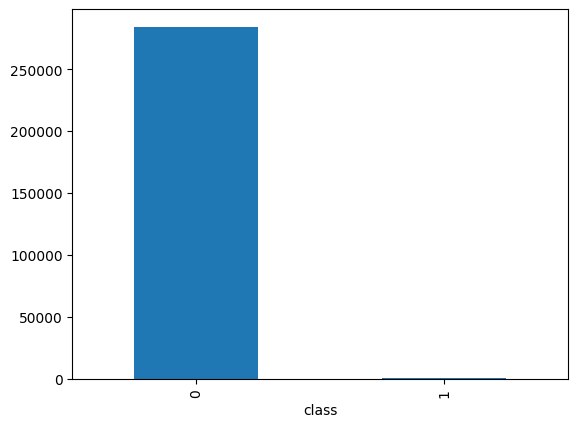

In [17]:
cc["class"].value_counts().plot(kind="bar")

In [31]:
legit=cc[cc["class"]==0]
fraud=cc[cc["class"]==1]

In [33]:
legit["amount"].sum()

25102462.04

In [34]:
fraud["amount"].sum()

60127.97

In [35]:
legit["amount"].describe().transpose()

,amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [36]:
fraud["amount"].describe().transpose()

,amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [43]:
cc.groupby("class").mean(numeric_only=True)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [44]:
legit_sample=legit.sample(492)

In [45]:
data=pd.concat([legit_sample,fraud],axis=0)

In [46]:
data["class"].value_counts()

,count
class,
0,492
1,492


In [48]:
data.groupby("class").mean(numeric_only=True)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount
class,,,,,,,,,,,,,,,,,,,,,
0,98959.412602,0.079348,-0.001225,-0.047032,0.084832,-0.019384,0.056535,0.024341,0.062056,0.060955,...,-0.019302,0.009454,0.057172,0.028413,0.010558,-0.027091,-0.018745,-0.006884,-0.007767,87.968455
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


#**Spliting Data**

In [53]:
x=data.drop(columns=["class","transaction_type"],axis=1)
y=data["class"]

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

#**Model Training**

In [55]:
model=LogisticRegression()

In [56]:
model.fit(x_train,y_train)
x_train_predict=model.predict(x_train)
train_acc=acc(x_train_predict,y_train)
print("Accuracy Score on Training Data: ",train_acc)

Accuracy Score on Training Data:  0.9186785260482846


In [57]:
model.fit(x_train,y_train)
x_test_predict=model.predict(x_test)
test_acc=acc(x_test_predict,y_test)
print("Accuracy Score on testing Data: ",test_acc)

Accuracy Score on testing Data:  0.8984771573604061
